<a href="https://colab.research.google.com/github/Abdullahfoysal/SelfDrivingCar/blob/master/Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
(10000, 28, 28)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


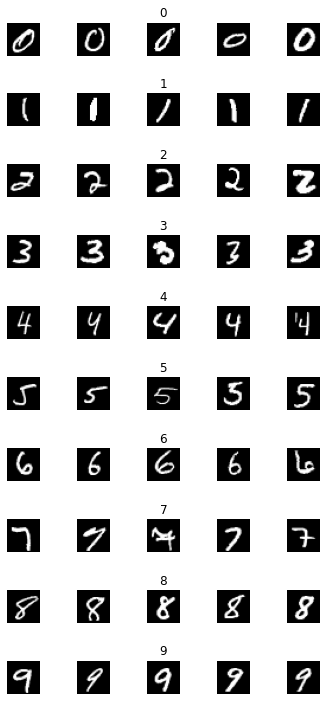

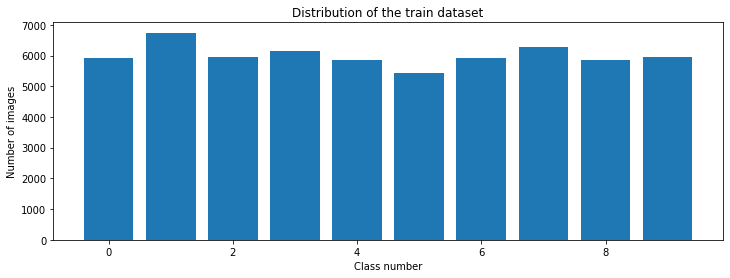

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random


np.random.seed(0)




(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))




print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 




In [108]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255


In [109]:
#define leNet Model Function
def leNet_Model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate =0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [110]:
model = leNet_Model()

In [111]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 15)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 375)               0         
                                                                 
 dense_10 (Dense)            (None, 500)              

In [112]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.1,batch_size=400,verbose =1,shuffle =True)

Epoch 1/5
135/135 [==============================] - 36s 260ms/step - loss: 0.2002 - accuracy: 0.9359 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 2/5
135/135 [==============================] - 36s 268ms/step - loss: 0.0536 - accuracy: 0.9835 - val_loss: 0.0354 - val_accuracy: 0.9898
Epoch 3/5
135/135 [==============================] - 36s 269ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0361 - val_accuracy: 0.9887
Epoch 4/5
135/135 [==============================] - 35s 258ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0430 - val_accuracy: 0.9867
Epoch 5/5
135/135 [==============================] - 35s 258ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0340 - val_accuracy: 0.9892


Text(0.5, 0, 'epoch')

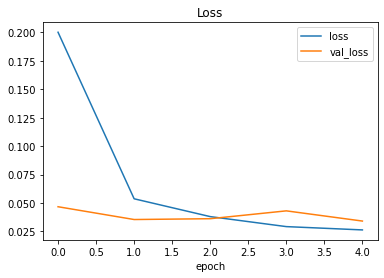

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title("Loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

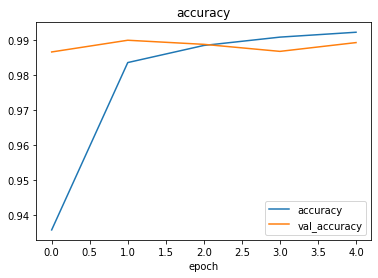

In [114]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title("accuracy")
plt.xlabel("epoch")

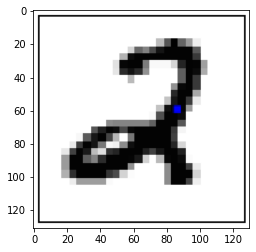

In [115]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url,stream =True)
img = Image.open(response.raw)
plt.imshow(img)


(28, 28, 3)


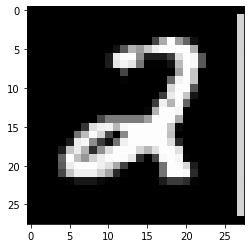

In [116]:
import cv2
img_array = np.asarray(img)
resize = cv2.resize(img_array,(28,28))
print(resize.shape)
gray_scale = cv2.cvtColor(resize,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap =plt.get_cmap("gray"))

In [117]:

image = image/255
image = image.reshape(1,28,28,1)

predict_x=model.predict(image) 
prediction=np.argmax(predict_x,axis=1)
print("prediction digit: ",str(prediction))


1/1 [==============================] - 0s 67ms/step
prediction digit:  [2]


(532, 350, 3)


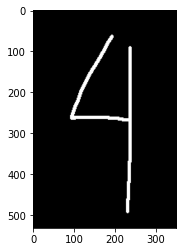

In [129]:
src ="./sample_image4.png"
img_grayscale = cv2.imread(src,1)
plt.imshow(img_grayscale)
print(img_grayscale.shape)

(28, 28, 3)


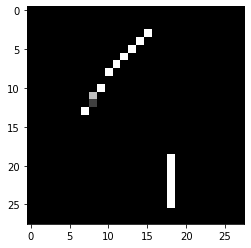

In [130]:
img_array = np.asarray(img_grayscale)
resize = cv2.resize(img_array,(28,28))
print(resize.shape)
gray_scale = cv2.cvtColor(resize,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(gray_scale,cmap =plt.get_cmap("gray"))

In [131]:

image = gray_scale/255
image = image.reshape(1,28,28,1)

predict_x=model.predict(image) 
prediction=np.argmax(predict_x,axis=1)
print("prediction digit: ",str(prediction))

1/1 [==============================] - 0s 19ms/step
prediction digit:  [4]


In [152]:
# Save the entire model on dir: /content
model.save('my_model.h5') 

#save on drive
from google.colab import drive
drive.mount('/content/gdrive')
import shutil
shutil.copy('/content/my_model.h5','/content/gdrive/MyDrive/trainedModel/')

In [158]:

new_model = keras.models.load_model('/content/gdrive/MyDrive/trainedModel/my_model.h5')

# Check its architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 15)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 375)               0         
                                                                 
 dense_10 (Dense)            (None, 500)              

In [133]:
predict_x=new_model.predict(image) 
prediction=np.argmax(predict_x,axis=1)
print("prediction digit: ",str(prediction))

1/1 [==============================] - 0s 25ms/step
prediction digit:  [4]


Downloading...
From: https://drive.google.com/uc?id=1-AKfqqQQEJVCVmRCa0seQJOgUGc8tBOY
To: /content/my_model.h5
100% 2.42M/2.42M [00:00<00:00, 160MB/s]


'/content/gdrive/MyDrive/trainedModel/my_model.h5'